In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

### Defining functions: cdf_cossquare, inv_cdf

In [9]:
def cdf_cossquare(theta):
    """This function gives the cumulative density function which has its pdf
    cos^2(theta) for 0<theta<pi/2. The cdf is (1/pi)*(2theta+sin(2*theta))"""
    return (1/np.pi)*(2*theta+np.sin(2*theta))

In [10]:
def inv_cdf(cdf):
    """This function gives the inverse of the cdf_cossquare.
    cdf=(1/pi)*(2theta+sin(theta)) is not invertible, but as it is monotically
    increasing, we use bisection method (binary search) to find inv_cdf."""
    
    low=0
    high=np.pi/2
    epsilon=1e-15
    while((high-low)>epsilon):
        mid = (low + high)/ 2;
        #print(high, low, mid)
        if (cdf_cossquare(mid) == cdf): return mid
        if (cdf_cossquare(mid) < cdf): low = mid
        else: high = mid
    return (low + high)/2

### Testing cdf_cossquare()

In [11]:
print('cdf_cossquare(0): ', cdf_cossquare(0))
print('cdf_cossquare(np.pi/8): ', cdf_cossquare(np.pi/8))
print('cdf_cossquare(np.pi/4): ', cdf_cossquare(np.pi/4))
print('cdf_cossquare(np.pi/2): ', cdf_cossquare(np.pi/2))

cdf_cossquare(0):  0.0
cdf_cossquare(np.pi/8):  0.47507907903927654
cdf_cossquare(np.pi/4):  0.8183098861837907
cdf_cossquare(np.pi/2):  1.0


### Calculating cos(x), cos<sup>2</sup>X

In [12]:
theta = [x for x in np.linspace(0, np.pi/2)]
print('Generated theta. Length of theta: ', len(theta))
print('Generating cosX...')
cosX = [np.cos(t) for t in theta]
print('Generating cossquareX...')
cossquareX = [cx*cx for cx in cosX]
print('Generating cdf_cossquareX...')
cdf_cossquareX = [cdf_cossquare(t) for t in theta]
print('Generating invcdf_cdf_X...')#invcdf(cdf(X))
invcdf_cdf_X=[inv_cdf(cdf_cossquare(t)) for t in theta]

a=[x for x in np.linspace(0, 1)]
print('Generated a. Length of a: ', len(a))
print('Generating inv_cdf_cossquareX...')
inv_cdf_cossquareX = [inv_cdf(x) for x in a]

Generated theta. Length of theta:  50
Generating cosX...
Generating cossquareX...
Generating cdf_cossquareX...
Generating invcdf_cdf_X...
Generated a. Length of a:  50
Generating inv_cdf_cossquareX...


### Plotting cos(x), cos<sup>2</sup>X: Difference between subplots() vs subplot()

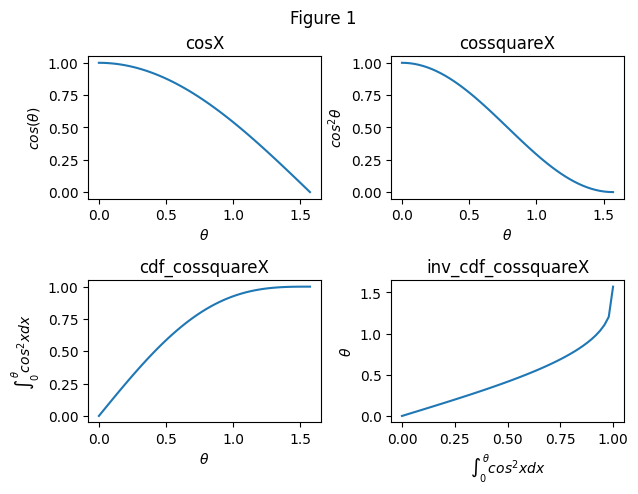

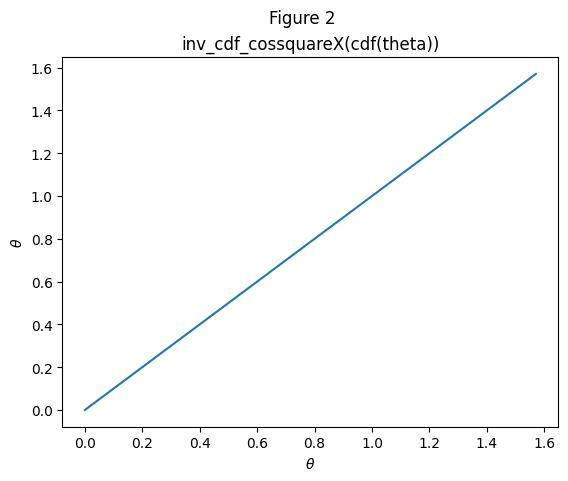

In [24]:
figure1, axis = plt.subplots(2, 2)
axis[0, 0].plot(theta, cosX)
axis[0, 0].set_xlabel(r'$\theta$')
axis[0, 0].set_ylabel(r'$cos(\theta)$')
axis[0, 0].set_title("cosX")

axis[0, 1].set_title("cossquareX")
axis[0, 1].set_xlabel(r'$\theta$')
axis[0, 1].set_ylabel(r'$ cos^2 \theta$')
axis[0, 1].plot(theta, cossquareX)

axis[1, 0].set_title("cdf_cossquareX")
plt.subplot(2,2,3) #plt.subplot used to make active existing axis (just testing a different way to plot)
plt.plot(theta, cdf_cossquareX)
plt.subplot(2,2,3).set_xlabel(r'$\theta$')
plt.subplot(2,2,3).set_ylabel(r'$\int_0^\theta cos^2x dx$')

plt.subplot(2,2,4).set_title("inv_cdf_cossquareX")#plt.subplot used to retrieve (and make active) existing axis
plt.plot(a, inv_cdf_cossquareX)
axis[1,1].set_xlabel(r'$\int_0^\theta cos^2x dx$')
axis[1,1].set_ylabel(r'$\theta$')
plt.tight_layout()
figure1.suptitle('Figure 1', y=1.02)

figure2, axis2 = plt.subplots(1,1)
axis2.plot(theta, invcdf_cdf_X)
axis2.set_title("inv_cdf_cossquareX(cdf(theta))")
axis2.set_xlabel(r'$\theta$')
axis2.set_ylabel(r'$\theta$')
figure2.suptitle('Figure 2')

plt.show()